<a href="https://colab.research.google.com/github/M3thsara/M3thsara-Image-Processing-and-Machine-Vision/blob/main/2024_07_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image1 = cv.imread('/content/drive/MyDrive/Images - EN3160 IPMV/store/store/store_shelf.png', cv.IMREAD_REDUCED_COLOR_2)
assert image1 is not None
template1 = cv.imread('/content/drive/MyDrive/Images - EN3160 IPMV/store/store/oat_crunch.jpg', cv.IMREAD_REDUCED_COLOR_2)
assert template1 is not None

sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1, None)
kp2, des2 = sift.detectAndCompute(template1, None)

In [ ]:
print(f"Number of keypoints in first image: {len(kp1)}")
print(f"Number of keypoints in second image: {len(kp2)}")

Number of keypoints in first image: 2409
Number of keypoints in second image: 5864


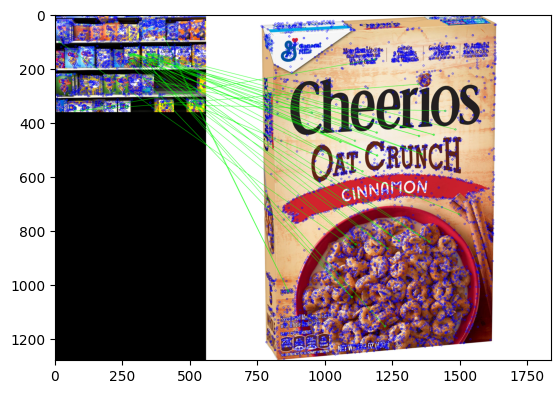

In [ ]:
FLAAN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLAAN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)

#Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
#ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

dra_params = dict(matchColor = (0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask = matchesMask,
                  flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(image1, kp1, template1, kp2, matches, None, **dra_params)
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.show()

In [51]:
image2 = cv.imread('/content/drive/MyDrive/Images - EN3160 IPMV/book_shelf.jpg', cv.IMREAD_REDUCED_COLOR_2)
assert image2 is not None
template2 = cv.imread('/content/drive/MyDrive/Images - EN3160 IPMV/Lab_Girl.jpg', cv.IMREAD_REDUCED_COLOR_2)
assert template2 is not None

sift = cv.SIFT_create()
kp3, des3 = sift.detectAndCompute(image2, None)
kp4, des4 = sift.detectAndCompute(template2, None)

In [52]:
print(f"Number of keypoints in first image: {len(kp3)}")
print(f"Number of keypoints in second image: {len(kp4)}")

Number of keypoints in first image: 2103
Number of keypoints in second image: 675


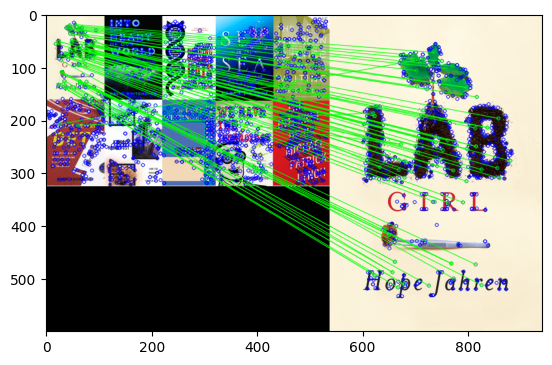

In [53]:
FLAAN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLAAN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des3,des4,k=2)

#Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
#ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

dra_params = dict(matchColor = (0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask = matchesMask,
                  flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(image2, kp3, template2, kp4, matches, None, **dra_params)
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.show()